# Preparação de Dados
Faça o download do dataset UCI HAR.

Carregue os dados em Python.

Identifique número de amostras, atributos e classes.


In [24]:
#Importação das bibliotecas necessárias
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
# Caminho base para o dataset
dataset_path = 'C:\\Users\\walis\\Documents\\Facul\\Redu-o-de-Dimensionalidade-na-Base-UCI-HAR\\UCI HAR Dataset'

# Features
features = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/features.txt'), 
                       sep=r'\s+', header=None, names=['id','name'])
feature_names = features['name'].tolist()

# Labels das atividades
activity_labels = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/activity_labels.txt'), 
                              sep=r'\s+', header=None, names=['id','label'])
class_names = activity_labels['label'].tolist()

# Carregar dados de treino
X_train = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/train/X_train.txt'), 
                      sep=r'\s+', header=None)
y_train = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/train/y_train.txt'), 
                      sep=r'\s+', header=None)

# Carregar dados de teste
X_test = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/test/X_test.txt'), 
                     sep=r'\s+', header=None)
y_test = pd.read_csv(os.path.join(dataset_path, 'UCI HAR Dataset/test/y_test.txt'), 
                     sep=r'\s+', header=None)

# Combinar dados
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

# Checar consistência
assert X.shape[1] == len(feature_names), "Número de colunas de X diferente do número de features!"

# Atribuir nomes
X.columns = feature_names

# Informações
print("Número de amostras:", X.shape[0])
print("Número de atributos:", X.shape[1])
print("Número de classes:", len(class_names))
print("Classes:", class_names)

Número de amostras: 10299
Número de atributos: 561
Número de classes: 6
Classes: ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']


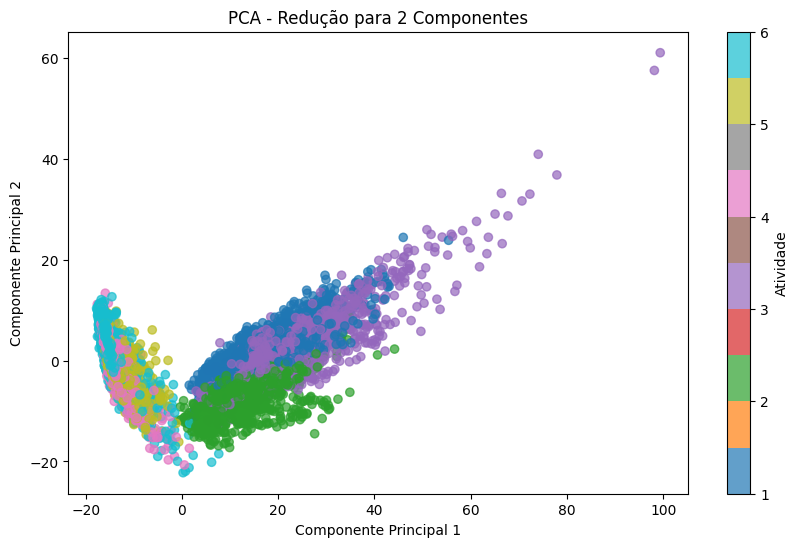

Variância explicada pelos 2 componentes: [0.50738221 0.06239186]
Variância total explicada (2 comp.): 0.5697740681020986
Número de componentes para explicar 90% da variância: 65


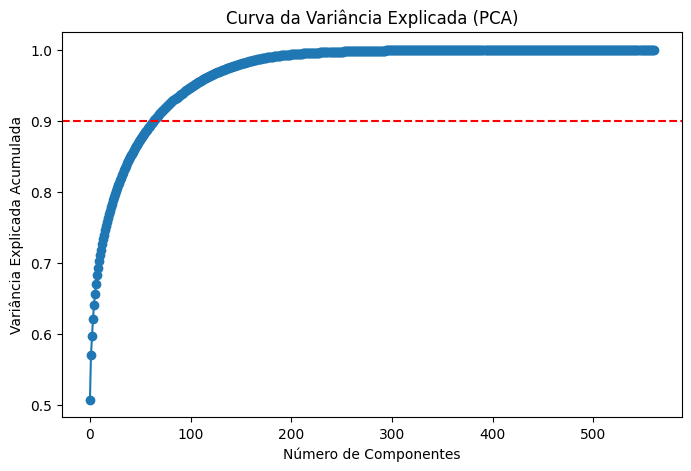

In [26]:
# Supondo que X = atributos (561 colunas), y = classes (ex: tipo de atividade)

# 1. Padronizar os dados (PCA é sensível à escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicar PCA com 2 componentes principais
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

# 3. Visualizar gráfico 2D
plt.figure(figsize=(10,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Redução para 2 Componentes")
plt.colorbar(scatter, label="Atividade")
plt.show()

# 4. Variância explicada pelos dois primeiros componentes
print("Variância explicada pelos 2 componentes:", pca_2d.explained_variance_ratio_)
print("Variância total explicada (2 comp.):", np.sum(pca_2d.explained_variance_ratio_))

# 5. Determinar quantos componentes são necessários para explicar pelo menos 90% da variância
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

n_components_90 = np.argmax(explained_variance >= 0.90) + 1
print(f"Número de componentes para explicar 90% da variância: {n_components_90}")

# (Opcional) Visualizar curva da variância acumulada
plt.figure(figsize=(8,5))
plt.plot(explained_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Curva da Variância Explicada (PCA)")
plt.show()